In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Step 1: Inspect Your Data Source


Start by opening the [site](https://realpython.github.io/fake-jobs/) you want to scrape with your favorite browser.

https://realpython.github.io/fake-jobs/


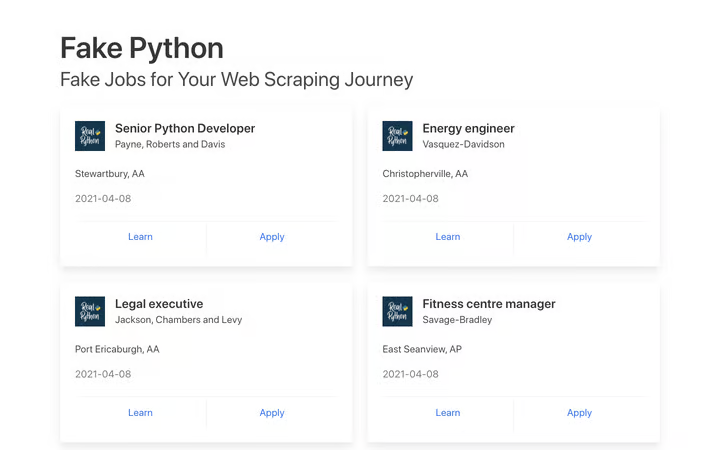


You can see many job postings in a card format, and each of them has two buttons. If you click Apply, then you’ll see a new page that contains more detailed descriptions of the selected job. You might also notice that the URL in your browser’s address bar changes when you interact with the website.


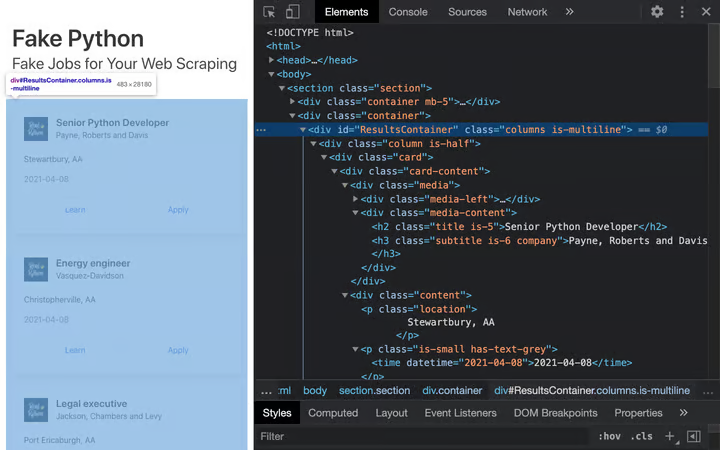

# Decipher the Information in URLs


A programmer can encode a lot of information in a URL. Your web scraping journey will be much easier if you first become familiar with how URLs work and what they’re made of. For example, you might find yourself on a details page that has the following URL:

https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

https://au.indeed.com/jobs?q=software+developer&l=Australia



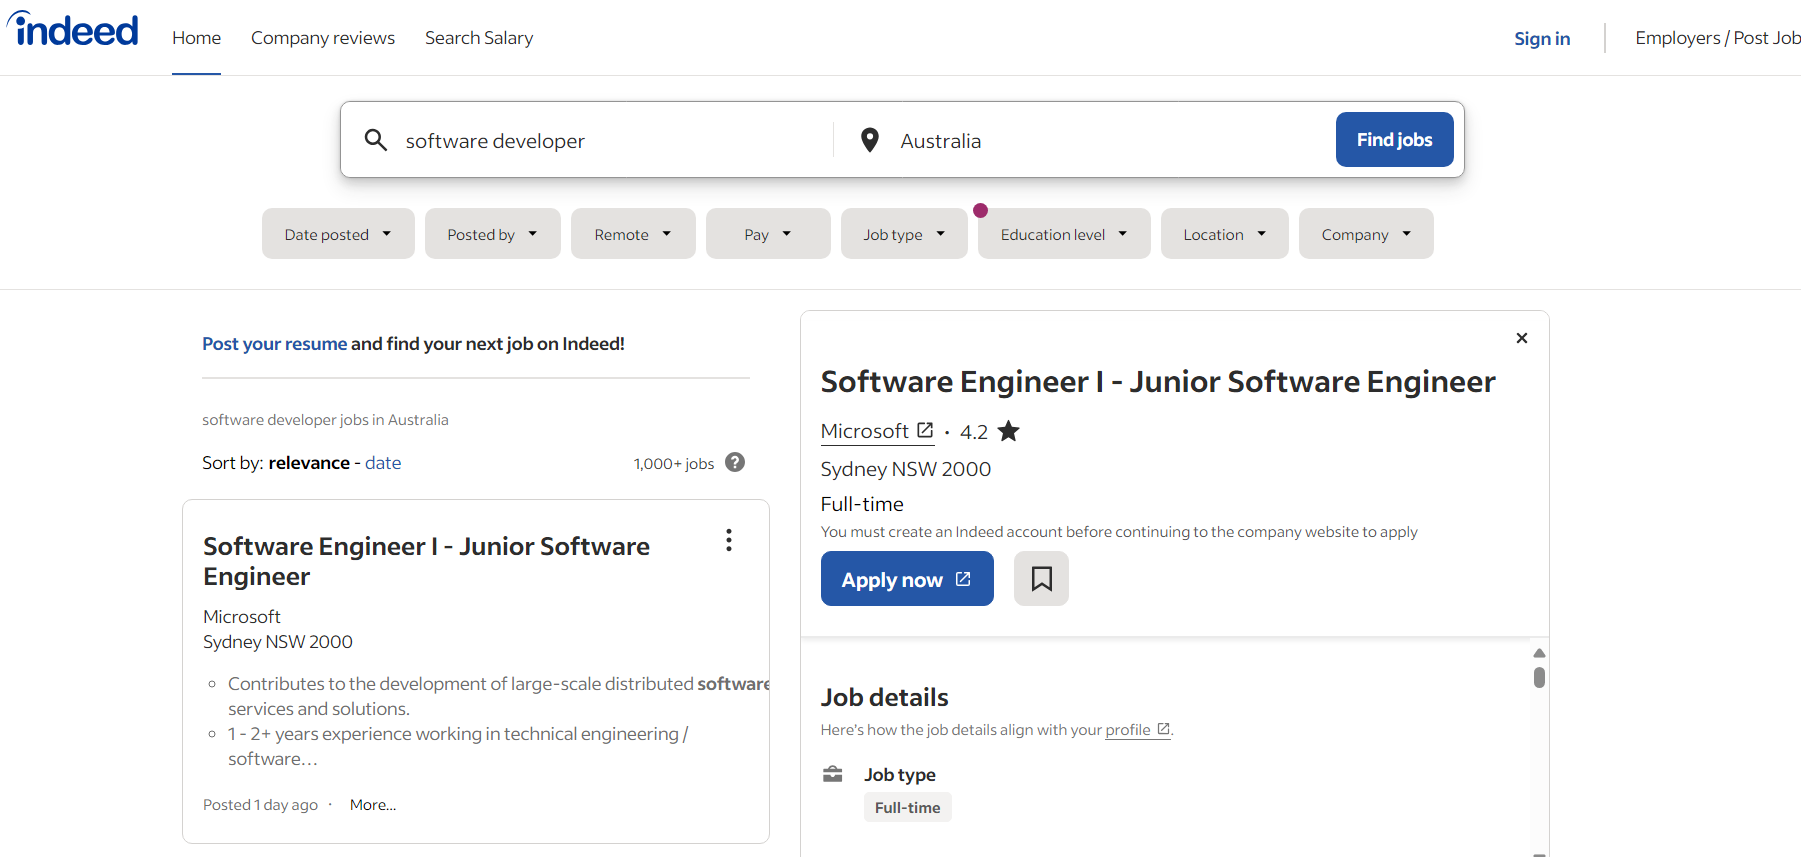


# Step 2: Scrape HTML Content From a Page

In [2]:
import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

In [3]:
page.status_code

200

# status code 

* Informational responses (100 – 199)
* Successful responses (200 – 299)
* Redirection messages (300 – 399)
* Client error responses (400 – 499)
* Server error responses (500 – 599)

https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [4]:
print(page.text[:300])

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="sectio


# HTML content
```
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img
            src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg"
            alt="Real Python Logo"
          />
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-5">Senior Python Developer</h2>
        <h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
      </div>
    </div>

    <div class="content">
      <p class="location">Stewartbury, AA</p>
      <p class="is-small has-text-grey">
        <time datetime="2021-04-08">2021-04-08</time>
      </p>
    </div>
    <footer class="card-footer">
      <a
        href="https://www.realpython.com"
        target="_blank"
        class="card-footer-item"
        >Learn</a
      >
      <a
        href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html"
        target="_blank"
        class="card-footer-item"
        >Apply</a
      >
    </footer>
  </div>
</div>
```

* class="title is-5" contains the title of the job posting.
* class="subtitle is-6 company" contains the name of the company that offers the position.
* class="location" contains the location where you’d be working.

# Step 3: Parse HTML Code With Beautiful Soup


In [5]:
! pip install beautifulsoup4 -q 

In [6]:
import requests
from bs4 import BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

# Find Elements by ID
```
<div id="ResultsContainer">
  <!-- all the job listings -->
</div>
```

In [7]:
results = soup.find(id="ResultsContainer")

In [8]:
# print(results.prettify())

# Find Elements by HTML Class Name

In [9]:
job_elements = results.find_all("div", class_="card-content")

In [10]:
job_elements[0]

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>

In [11]:
# just print 3 jobs info 
count = 0
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    link = job_element.find_all("a", class_="card-footer-item")[1]
    print(title_element)
    print(company_element)
    print(location_element)
    print(link)
    print('-------------------')
    count+= 1
    if count == 3:
        break 

<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
<p class="location">
        Stewartbury, AA
      </p>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
-------------------
<h2 class="title is-5">Energy engineer</h2>
<h3 class="subtitle is-6 company">Vasquez-Davidson</h3>
<p class="location">
        Christopherville, AA
      </p>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/energy-engineer-1.html" target="_blank">Apply</a>
-------------------
<h2 class="title is-5">Legal executive</h2>
<h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>
<p class="location">
        Port Ericaburgh, AA
      </p>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html" target="_blank">Apply</a>
-------------------


In [12]:
title_element

<h2 class="title is-5">Legal executive</h2>

In [13]:
title_element.text

'Legal executive'

In [14]:
link

<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html" target="_blank">Apply</a>

In [15]:
link['href']

'https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html'

# save results into DF 


In [16]:

titles = []
companies = []
locations = []
links = []

for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    link = job_element.find_all("a", class_="card-footer-item")[1]
    titles.append(title_element.text)
    companies.append(company_element.text)
    locations.append(location_element.text.strip())
    links.append(link['href'])
    
data = {
    'Title': titles, 
    'Company': companies,
    'Location': locations,
    'link': links
}
df = pd.DataFrame(data)
df

,Title,Company,Location,link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",https://realpython.github.io/fake-jobs/jobs/se...
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",https://realpython.github.io/fake-jobs/jobs/en...
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",https://realpython.github.io/fake-jobs/jobs/le...
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",https://realpython.github.io/fake-jobs/jobs/fi...
4,Product manager,Ramirez Inc,"North Jamieview, AP",https://realpython.github.io/fake-jobs/jobs/pr...
...,...,...,...,...
95,Museum/gallery exhibitions officer,"Nguyen, Yoder and Petty","Lake Abigail, AE",https://realpython.github.io/fake-jobs/jobs/mu...
96,"Radiographer, diagnostic",Holder LLC,"Jacobshire, AP",https://realpython.github.io/fake-jobs/jobs/ra...
97,Database administrator,Yates-Ferguson,"Port Susan, AE",https://realpython.github.io/fake-jobs/jobs/da...
98,Furniture designer,Ortega-Lawrence,"North Tiffany, AA",https://realpython.github.io/fake-jobs/jobs/fu...
